### Import required libraries

In [1]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, ensemble
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import games.csv

In [2]:
games = pd.read_csv('games.csv')
games.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Still Time,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,T
1,Surf World Series,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2,The Metronomicon: Slay the Dance Floor,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T
3,Windjammers,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
4,Rock of Ages 2: Bigger and Boulder,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,ET


### View rating categories distribution

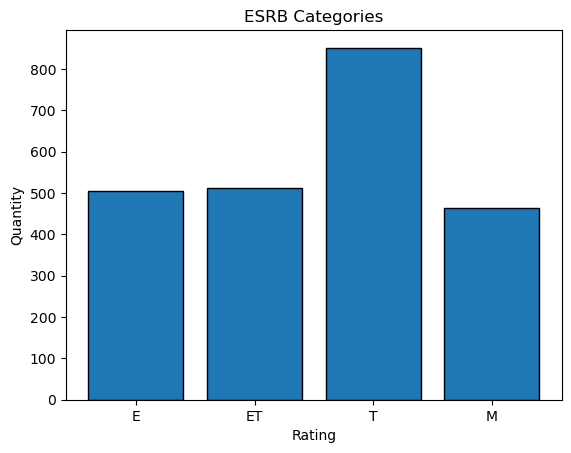

In [3]:
# Define the custom order for both x-axis ticks and bar order
custom_order = ['E', 'ET', 'T', 'M']

# Count occurrences of each category
counts = games['esrb_rating'].value_counts().reindex(custom_order, fill_value=0)

# Create a bar plot
plt.bar(custom_order, counts, edgecolor='black')

plt.title('ESRB Categories')
plt.xlabel('Rating')
plt.ylabel('Quantity')

plt.show()

### View violence distribution

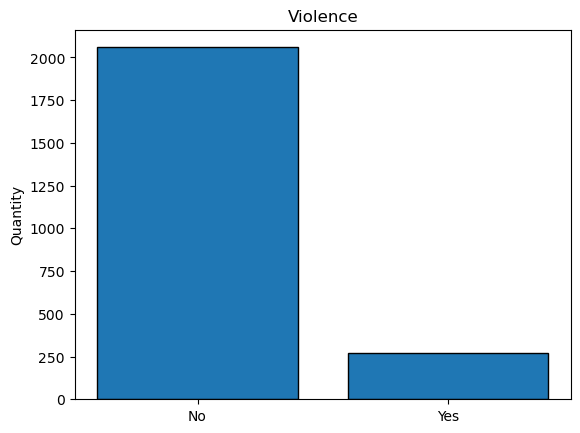

In [4]:
violence_counts = games['violence'].value_counts()

plt.bar(violence_counts.index, violence_counts, edgecolor='black')

plt.xticks([0, 1], ['No', 'Yes'])

plt.title('Violence')
plt.ylabel('Quantity')

plt.show()

### View inappropriate language distribution

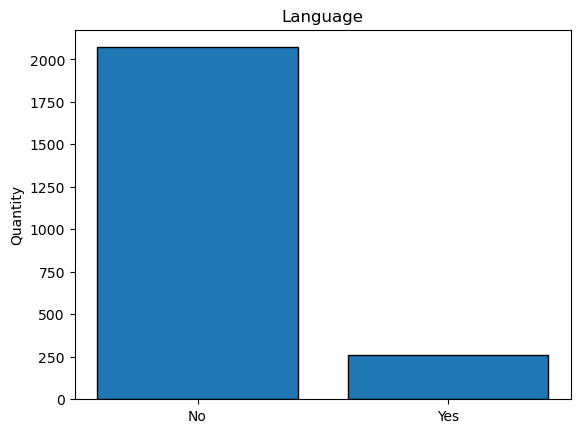

In [5]:
counts = games['language'].value_counts()

plt.bar(counts.index, counts, edgecolor='black')

plt.xticks([0, 1], ['No', 'Yes'])

plt.title('Language')
plt.ylabel('Quantity')

plt.show()

### View blood distribution

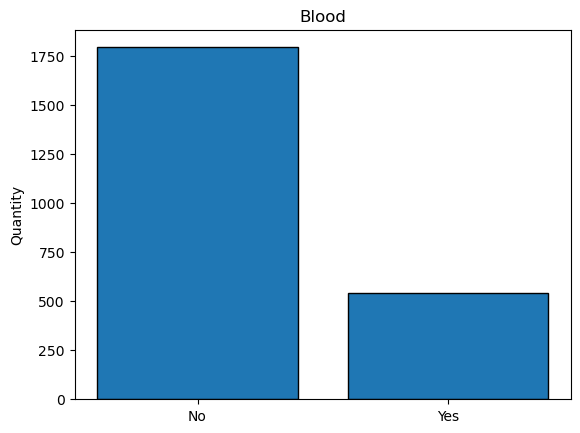

In [6]:
counts = games['blood'].value_counts()

plt.bar(counts.index, counts, edgecolor='black')

plt.xticks([0, 1], ['No', 'Yes'])

plt.title('Blood')
plt.ylabel('Quantity')

plt.show()

### Remove columns: "title" & "console" as they are not relevant to ESRB rating

In [7]:
games.drop(['title', 'console'], axis = 1, inplace = True)
games

,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,T
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,T
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,ET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2328,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,ET
2329,0,0,0,0,0,0,0,1,0,0,...,1,1,0,1,0,0,0,0,0,M
2330,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,T


### Apply one-hot encoding to "esrb_rating" column (to extract binary values)

In [8]:
games = pd.get_dummies(games, columns=['esrb_rating'], prefix='esrb_rating')
games = games.astype(int)
games.iloc[:, -4:].head()

,esrb_rating_E,esrb_rating_ET,esrb_rating_M,esrb_rating_T
0,0,0,0,1
1,1,0,0,0
2,0,0,0,1
3,1,0,0,0
4,0,1,0,0


In [9]:
# Swap positions of columns 'B' and 'C'
cols = list(games.columns)
a, b = cols.index('esrb_rating_M'), cols.index('esrb_rating_T')
cols[b], cols[a] = cols[a], cols[b]
games = games[cols]
games.iloc[:, -4:].head()

,esrb_rating_E,esrb_rating_ET,esrb_rating_T,esrb_rating_M
0,0,0,1,0
1,1,0,0,0
2,0,0,1,0
3,1,0,0,0
4,0,1,0,0


### Generate correlation matrix

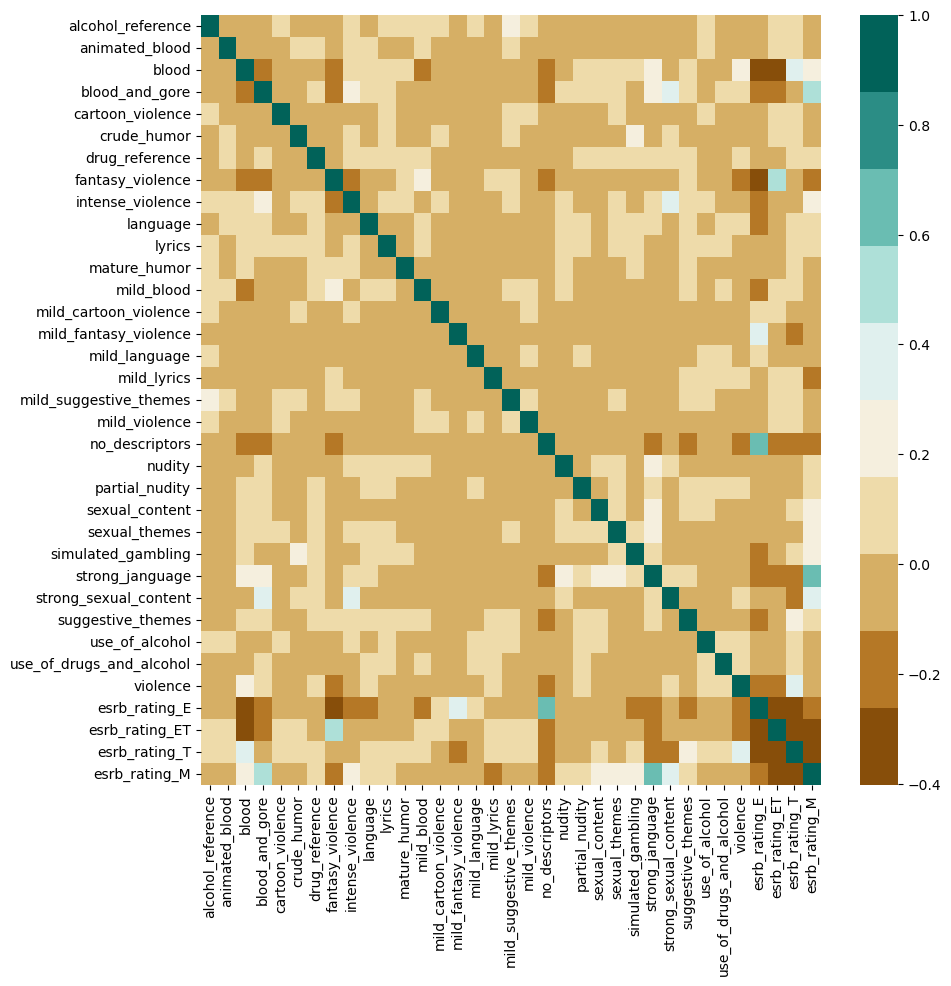

In [10]:
correlations = games.corr()
fig, ax = plt.subplots(figsize=(10, 10))

colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlations, 
    cmap=colormap)
ax.set_yticklabels(games.columns);

plt.show()

### Prepare and split the data for training and validation

In [11]:
X = games.drop(['esrb_rating_E', 'esrb_rating_ET', 'esrb_rating_T', 'esrb_rating_M'], axis=1).to_numpy()
y = games.loc[:, ['esrb_rating_E', 'esrb_rating_ET', 'esrb_rating_T', 'esrb_rating_M']].to_numpy()

In [12]:
X

array([[0, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
y

array([[0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [1, 0, 0, 0]])

In [14]:
y = np.argmax(y, axis=1)
y[:10]

array([2, 0, 2, 0, 1, 3, 3, 1, 0, 2])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2137)

In [16]:
y_train

array([2, 0, 3, ..., 3, 2, 3])

In [17]:
custom_example = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

### 

In [18]:
# universal method for training and evaluation of models

def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # train model
    classifier.fit(feature_vector_train, label)
    
    # generate labels for validation set
    predictions = classifier.predict(feature_vector_valid)

    predicted_class = classifier.predict(custom_example)
    print("Predicted example:", predicted_class)
    
    # evealuate model based on test set labels
    scores = list(metrics.precision_recall_fscore_support(predictions, y_test))
    
    score_vals = [
        scores[0][0],
        scores[1][0],
        scores[2][0]
    ]
    score_vals.append(metrics.accuracy_score(predictions, y_test))
    return score_vals

### MODEL 1 - logistic regression

In [19]:
# MODEL 1 - logistic regression
accuracy = train_model(linear_model.LogisticRegression(), X_train, y_train, X_test)
accuracy_compare = {'LR': accuracy}
print ("LR: ", accuracy)

Predicted example: [2]
LR:  [0.989010989010989, 0.9473684210526315, 0.967741935483871, 0.8436830835117773]


In [20]:
# MODEL 2 - Support Vector Machine
accuracy = train_model(svm.SVC(), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM" , accuracy)

Predicted example: [2]
SVM [0.967032967032967, 0.967032967032967, 0.967032967032967, 0.8715203426124197]


In [21]:
# MODEL 3 - Random Forest Tree 
accuracy = train_model(ensemble.RandomForestClassifier(), X_train, y_train, X_test)
accuracy_compare['RF'] = accuracy
print ("RF: ", accuracy)

Predicted example: [2]
RF:  [0.978021978021978, 0.967391304347826, 0.9726775956284153, 0.867237687366167]


In [23]:
# MODEL 4 - neural network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
accuracy = train_model(mlp, X_train, y_train, X_test)
accuracy_compare['neural network'] = accuracy
print ("neural network" , accuracy)

Predicted example: [2]
neural network [0.978021978021978, 0.967391304347826, 0.9726775956284153, 0.8629550321199143]


In [24]:
# corrections and adjustments - use different hyperparameters

# MODEL 5 - Support Vector Machine
accuracy = train_model(svm.SVC(gamma='auto'), X_train, y_train, X_test)
accuracy_compare['SVM-a'] = accuracy
print ("SVM gamma='auto'" , accuracy)

# MODEL 6 - Support Vector Machine
accuracy = train_model(svm.SVC(kernel='sigmoid'), X_train, y_train, X_test)
accuracy_compare['SVM-s'] = accuracy
print ("SVM kernel='sigmoid'" , accuracy)

# MODEL 7 - Support Vector Machine
accuracy = train_model(svm.SVC(degree=4), X_train, y_train, X_test)
accuracy_compare['SVM-d'] = accuracy
print ("SVM degree=4" , accuracy)

Predicted example: [3]
SVM gamma='auto' [0.9340659340659341, 0.9550561797752809, 0.9444444444444444, 0.8222698072805139]
Predicted example: [3]
SVM kernel='sigmoid' [0.989010989010989, 0.9375, 0.9625668449197862, 0.7751605995717344]
Predicted example: [2]
SVM degree=4 [0.967032967032967, 0.967032967032967, 0.967032967032967, 0.8715203426124197]


<Axes: >

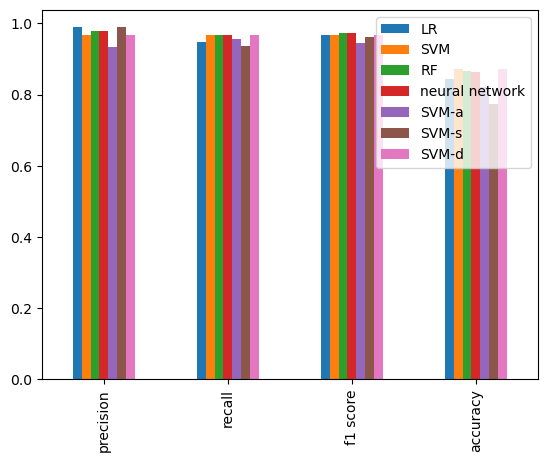

In [25]:
# compare models

df_compare = pd.DataFrame(accuracy_compare, index = ['precision', 'recall', 'f1 score', 'accuracy'])
df_compare.plot(kind='bar')